In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
flat_chess = cv2.imread("../DATA/flat_chessboard.png")

In [3]:
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

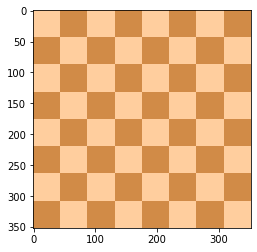

In [4]:
plt.imshow(flat_chess)

In [7]:
 gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)

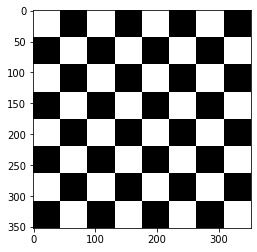

In [8]:
plt.imshow(gray_flat_chess, cmap='gray')

In [9]:
real_chess =cv2.imread('../DATA/real_chessboard.jpg')

In [10]:
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

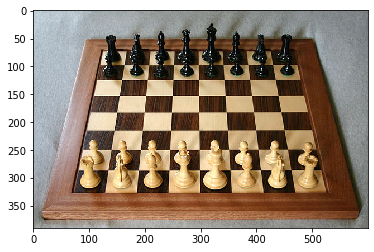

In [11]:
plt.imshow(real_chess)

In [12]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)

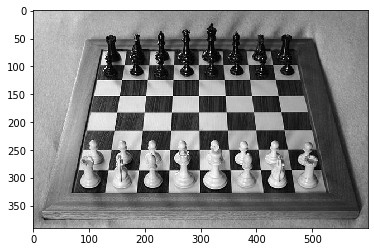

In [13]:
plt.imshow(gray_real_chess, cmap='gray')

In [14]:
# Harris corner detection must use floating point numbers

In [15]:
gray = np.float32(gray_flat_chess) # convert to floating point 

In [16]:
gray

array([[215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       ...,
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.]], dtype=float32)

# HARRIS CORNER DETECTION

In [18]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [19]:
# Grab the result using morphological operators
dst = cv2.dilate(dst, None) # not nescessary

In [20]:
flat_chess[dst>0.01*dst.max()] = [255, 0, 0] # convert to red

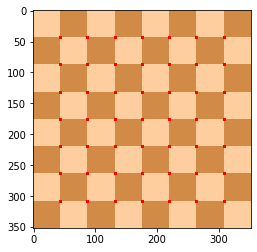

In [22]:
plt.imshow(flat_chess) # harris corner consider board image as flat since it has no comparision 

In [23]:
gray = np.float32(gray_real_chess)

In [24]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [27]:
# Grab the result using morphological operators
dst = cv2.dilate(dst, None) # not nescessary
real_chess[dst>0.01*dst.max()] = [255, 0, 0] # convert to red

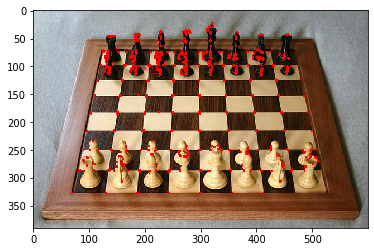

In [28]:
plt.imshow(real_chess)

In [29]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

# SHI TOMASHI CORNER DETECTION

In [37]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 10, 0.01, 10  ) # second params decides how many corners would you like to detect, if unlimited. set to -1 

In [38]:
corners = np.int0(corners)

In [39]:
corners

array([[[308, 308]],

       [[264, 308]],

       [[220, 308]],

       [[176, 308]],

       [[132, 308]],

       [[ 88, 308]],

       [[ 44, 308]],

       [[308, 264]],

       [[264, 264]],

       [[220, 264]]], dtype=int64)

In [40]:
for i in corners:
    x, y = i.ravel() 
    cv2.circle(flat_chess, (x,y), 3, (255,0,0), -1)

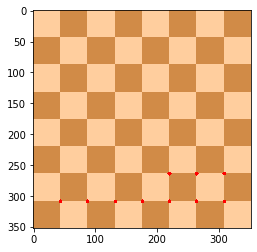

In [41]:
plt.imshow(flat_chess)

In [46]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 100, 0.01, 10)

In [47]:
corners = np.int0(corners)

In [48]:
for i in corners:
    x, y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255,0,0), -1)
    

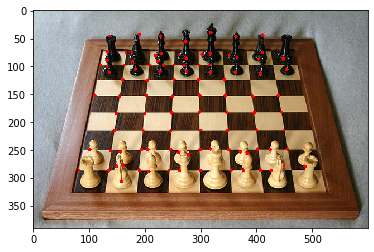

In [49]:
plt.imshow(real_chess)